<a href="https://colab.research.google.com/github/poojapotdar38/EDA--Hotel-Bookings/blob/main/preoject3_mobile_price_range_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MACHINE LEARNING PROJECT: MOBILE PHONE PRICE PREDICTION**

Introduction
In this project, we are going to explore and analyze a dataset which contains specifications of two thousand mobile phones and try to predict optimum price ranges for a list of mobile phones in the market by applying various machine learning algorithms such as logistic regression, decision tree, random forest and k-nearest neighbors(knn).


In [ ]:
#Importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
mp=pd.read_csv("/content/drive/MyDrive/data_mobile_price_range.csv")

In [ ]:
mp.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
mp.shape

(2000, 21)

In [ ]:
mp.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

id: ID
battery_power: Total energy a battery can store in one time measured in mAh

blue: Has bluetooth or not

clock_speed: speed at which microprocessor executes instructions

dual_sim: Has dual sim support or not

fc: Front Camera mega pixels

four_g: Has 4G or not

int_memory: Internal Memory in Gigabytes

m_dep: Mobile Depth in cm

mobile_wt: Weight of mobile phone

n_cores: Number of cores of processor

pc: Primary Camera mega pixels

px_height: Pixel Resolution Height

px_width: Pixel Resolution Width

ram: Random Access Memory in Megabytes

sc_h: Screen Height of mobile in cm

sc_w: Screen Width of mobile in cm

talk_time: longest time that a single battery charge will last when you are

three_g: Has 3G or not

touch_screen: Has touch screen or not

wifi: Has wifi or not

 price_range: This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost)

In [ ]:
#checking null values
mp.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

There is no null values in this dataset.

In [ ]:
mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
mp.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


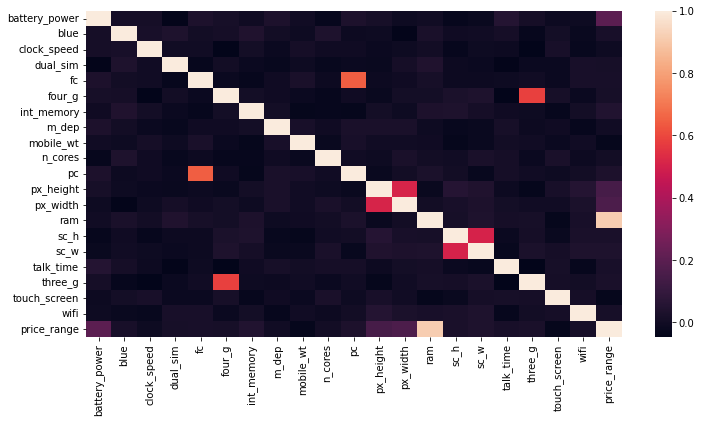

In [ ]:
##checking correlation between features
plt.figure(figsize=(12,6))
sns.heatmap(mp.corr())
plt.show()

We see from the heatmap;

the most influential variable is ram
most of the variables have very little correlation to price range
primary camera mega pixels and front Camera mega pixels have correlation (it make sense because both of them reflect technology level of resolution of the related phone model) but they do not effect prige range.
having 3G and 4G is somewhat correlated
there is no highly correlated inputs in our dataset, so there is no multicollinearity problem.

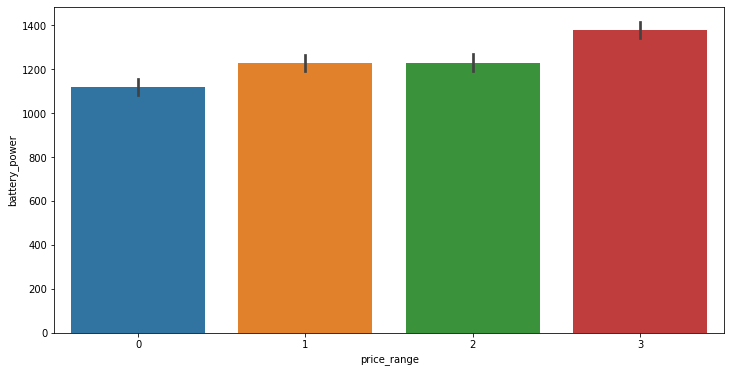

In [ ]:
#relation between price range and battery power
plt.figure(figsize=(12,6))
sns.barplot(x='price_range',y='battery_power',data=mp)
plt.show()


from above visualization it is clear that as battery power increases price range also increases


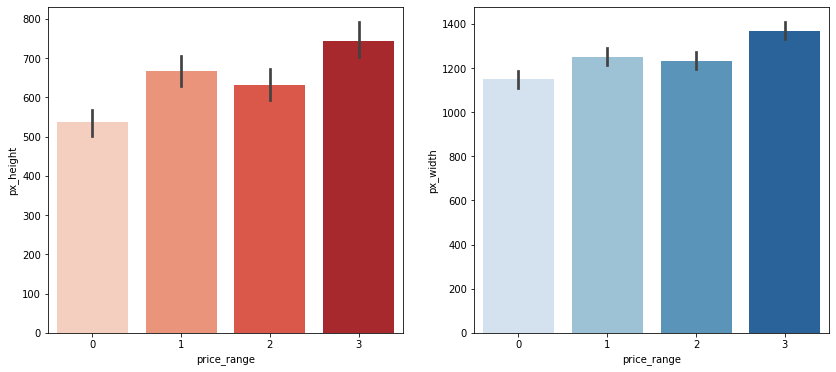

In [ ]:
##plot between price range and pixel height pixel width
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(x='price_range',y='px_height',data=mp,palette='Reds')
plt.subplot(1,2,2)
sns.barplot(x='price_range',y='px_width',data=mp,palette='Blues')

we can see here mobile price range category3 having highest px_height and mobile price range category 0 having lowest height compared to category3.also same looks for price range and px_width as price range increases pixl width also increases.


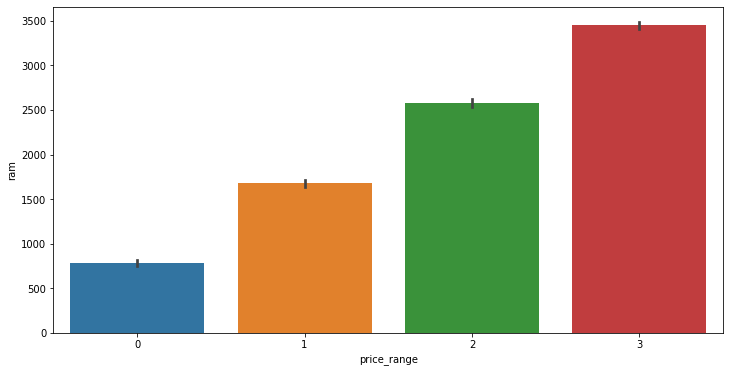

In [ ]:
#relation between price range and ram
plt.figure(figsize=(12,6))
sns.barplot(x='price_range',y='ram',data=mp)
plt.show()


as we can see here price increases ram also increase.

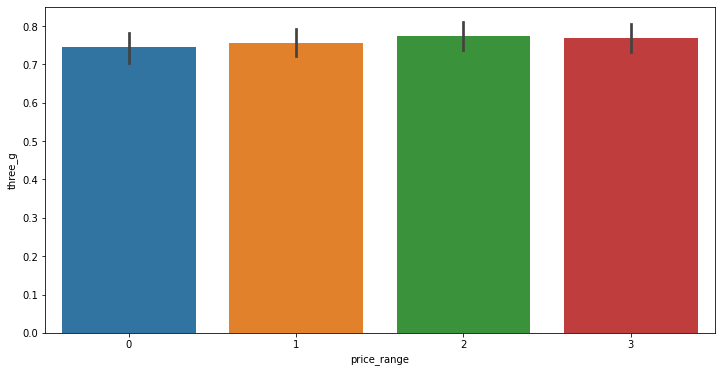

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='price_range',y='three_g',data=mp)
plt.show()

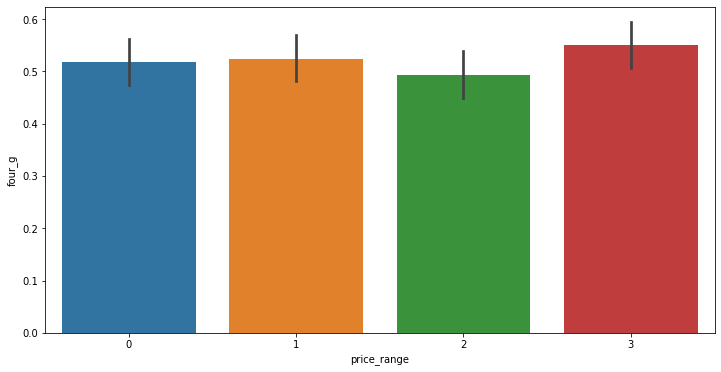

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='price_range',y='four_g',data=mp)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


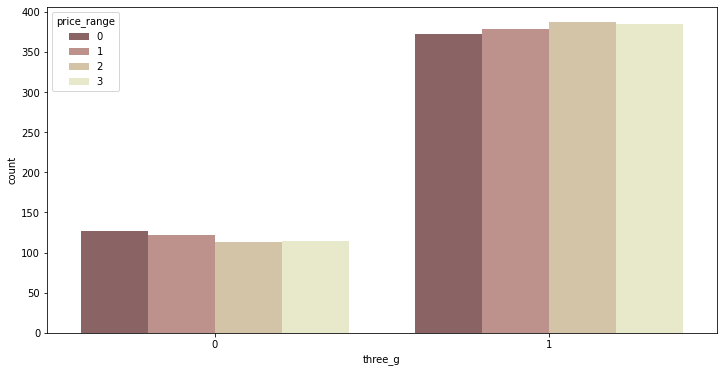

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(mp['three_g'],hue=mp['price_range'],palette='pink')
plt.show()

zero means mobiles are not 3g and 1 means mobiles are 3g so we can check how many 3g mobiles are here,among 3g mobiles how many belongs to 1st category ,2nd category and 3rd category it shows

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


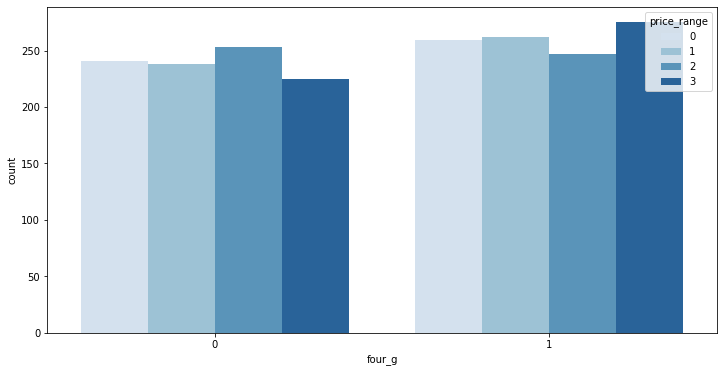

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(mp['four_g'],hue=mp['price_range'],palette='Blues')
plt.show()

we can see from above visualization mobile belongs to 4g mobile having highest cost means it belongs to 3rd category.

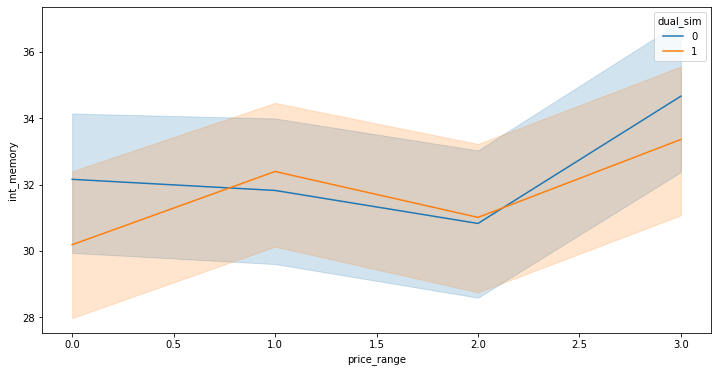

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='price_range',y='int_memory',data=mp,hue='dual_sim')
plt.show()

from above plot we can see how many mobile having double sim feature 0 means single sim and 1 means double sim
for dual sim:mobile belongs to 0category having low int memory,and mobile belongs to 3rd category having more int memory
for simgle sim: price range are around to same because if mobile phone are not having dual sim they having more int memory compare to dual sim thats why price range category almost same for both

Implementation of ML Algorithms
To predict the mobile phone prices, we are going to apply below algorithms respectively on the training and validation dataset. After that, we are going to choose the best model for our data set and create target values for test dataset.

1.Logistic regression
2.Decision tree
3.Random forest
4.KNN
5.Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
mp_train,mp_test = train_test_split(mp,test_size=.2)

In [ ]:

mp_train_x=mp_train.iloc[:,0:-1]
mp_train_y=mp_train.iloc[:,-1]
mp_test_x=mp_test.iloc[:,0:-1]
mp_test_y=mp_test.iloc[:,-1]

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()
dt.fit(mp_train_x,mp_train_y)  ###model has been created

DecisionTreeClassifier()

In [ ]:
pred_dt=dt.predict(mp_test_x) ##prediction is done

In [ ]:
pred_dt

array([1, 0, 3, 2, 3, 3, 3, 2, 1, 0, 3, 3, 1, 2, 3, 2, 0, 0, 3, 0, 0, 3,
       0, 2, 1, 1, 1, 1, 2, 1, 3, 0, 2, 2, 3, 1, 1, 0, 0, 1, 3, 2, 1, 2,
       1, 0, 2, 2, 0, 0, 0, 1, 2, 2, 0, 0, 3, 2, 1, 2, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 3, 0, 0, 3, 3, 3, 3, 3, 1, 0, 2, 3, 0, 1, 0, 2, 0, 2, 3,
       1, 3, 3, 0, 3, 2, 3, 0, 0, 2, 0, 1, 1, 2, 3, 0, 2, 3, 0, 1, 1, 1,
       0, 1, 3, 3, 2, 1, 0, 1, 3, 3, 3, 3, 1, 0, 3, 3, 2, 1, 1, 0, 3, 0,
       2, 3, 3, 1, 2, 2, 0, 0, 0, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 2, 3, 0,
       1, 0, 2, 3, 1, 3, 1, 3, 0, 3, 3, 3, 0, 3, 0, 2, 3, 0, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 0, 1, 1, 3, 3, 3, 2, 1, 0, 1, 2, 3, 3, 1, 1, 0, 0,
       0, 0, 3, 2, 2, 1, 0, 0, 2, 3, 0, 3, 0, 2, 0, 1, 1, 3, 3, 3, 1, 1,
       2, 0, 2, 3, 2, 0, 2, 1, 1, 0, 2, 1, 3, 2, 2, 3, 1, 3, 1, 2, 3, 0,
       1, 0, 3, 3, 1, 2, 2, 0, 2, 3, 3, 1, 2, 1, 0, 2, 0, 2, 1, 3, 0, 2,
       3, 0, 1, 1, 1, 2, 1, 1, 0, 3, 2, 0, 0, 0, 3, 0, 3, 0, 3, 1, 1, 3,
       1, 3, 0, 2, 3, 0, 3, 0, 3, 2, 3, 3, 1, 2, 2,

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
tab_train=confusion_matrix(pred_dt,mp_test_y)  ###confusion_matrix(pred,actual)

In [ ]:
tab_train=confusion_matrix(pred_dt,mp_test_y)  ###confusion_matrix(pred,actual)
tab_train

array([[ 93,   7,   0,   0],
       [ 14,  80,  10,   0],
       [  0,  10,  69,   7],
       [  0,   0,   8, 102]])

In [ ]:
dt_acc=accuracy_score(pred_dt,mp_test_y)
dt_acc

0.86

In [ ]:
dt.feature_importances_

array([0.14620009, 0.00305001, 0.00467361, 0.        , 0.00418718,
       0.00083347, 0.00686298, 0.00414881, 0.01243105, 0.00431551,
       0.01105671, 0.1222649 , 0.04843263, 0.60774   , 0.00994401,
       0.00568598, 0.00595048, 0.00138911, 0.        , 0.00083347])

In [ ]:
mp_imp_feature=pd.DataFrame({"Features":mp_train_x.columns,"score":dt.feature_importances_})

In [ ]:
mp_imp_feature

,Features,score
0,battery_power,0.146200
1,blue,0.003050
2,clock_speed,0.004674
3,dual_sim,0.000000
4,fc,0.004187
5,four_g,0.000833
6,int_memory,0.006863
7,m_dep,0.004149
8,mobile_wt,0.012431
9,n_cores,0.004316


In [ ]:
mp_imp_feature.sort_values("score",ascending=False)

,Features,score
13,ram,0.607740
0,battery_power,0.146200
11,px_height,0.122265
12,px_width,0.048433
8,mobile_wt,0.012431
10,pc,0.011057
14,sc_h,0.009944
6,int_memory,0.006863
16,talk_time,0.005950
15,sc_w,0.005686


In [ ]:
from sklearn.model_selection import GridSearchCV 

In [ ]:
Search_dict={"criterion":["gini","entropy"],"max_depth":range(4,10),"min_sample_split":range(50,75)}

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
grid=GridSearchCV(dt,param_grid=Search_dict)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
from sklearn.model_selection import GridSearchCV
search_dict = {"criterion": ["gini", "entropy"], "max_depth": range(4,10), "min_samples_split": range(50,75)}
grid = GridSearchCV(dt, param_grid = search_dict)
grid.fit(mp_train_x, mp_train_y)
GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 10),
                         'min_samples_split': range(50, 75)})

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(4, 10),
                         'min_samples_split': range(50, 75)})

In [ ]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 52}

In [ ]:
###random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:

rfc=RandomForestClassifier()

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(mp_train_x,mp_train_y)  ###model has been created

RandomForestClassifier()

In [ ]:
pred_rf=rfc.predict(mp_test_x)

In [ ]:
tab_train=confusion_matrix(pred_dt,mp_test_y)  ###confusion_matrix(pred,actual)
tab_train

array([[ 93,   7,   0,   0],
       [ 14,  80,  10,   0],
       [  0,  10,  69,   7],
       [  0,   0,   8, 102]])

In [ ]:
rf_acc=accuracy_score(pred_rf,mp_test_y)
rf_acc

0.89

In [ ]:
###cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
scores_dt=cross_val_score(dt,mp_train_x,mp_train_y,cv=7,verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.1s finished


In [ ]:
scores_dt
scores_dt.mean()
scores_dt.min()
scores_dt.max()

0.8728070175438597

In [ ]:
 #####knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(mp_train_x,mp_train_y)

KNeighborsClassifier()

In [ ]:
pred_knn=knn.predict(mp_test_x)
pred_knn

array([1, 0, 3, 2, 3, 3, 3, 2, 1, 0, 3, 3, 0, 1, 3, 2, 0, 0, 3, 0, 0, 3,
       0, 2, 1, 1, 1, 1, 2, 2, 3, 0, 3, 2, 3, 1, 1, 0, 1, 1, 3, 3, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 0, 0, 3, 2, 1, 3, 1, 0, 0, 0, 2, 0,
       1, 1, 0, 3, 0, 0, 3, 3, 3, 3, 3, 1, 0, 2, 3, 1, 0, 0, 1, 0, 2, 3,
       0, 2, 3, 0, 3, 1, 3, 0, 0, 2, 0, 1, 2, 2, 3, 0, 2, 3, 0, 1, 1, 2,
       0, 1, 3, 2, 2, 1, 0, 1, 3, 3, 3, 3, 0, 0, 3, 3, 2, 1, 1, 0, 3, 1,
       2, 3, 3, 1, 2, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 1, 2, 2, 1, 2, 3, 0,
       1, 0, 3, 2, 1, 3, 1, 3, 0, 3, 3, 3, 0, 3, 0, 1, 3, 0, 3, 1, 2, 2,
       0, 2, 3, 3, 3, 0, 1, 1, 3, 3, 3, 2, 1, 0, 1, 2, 3, 3, 0, 1, 0, 0,
       1, 0, 3, 2, 1, 1, 0, 0, 2, 3, 0, 3, 0, 2, 0, 1, 0, 3, 3, 3, 2, 1,
       2, 0, 2, 3, 2, 0, 2, 1, 1, 0, 2, 1, 3, 2, 2, 3, 0, 3, 1, 2, 3, 0,
       1, 0, 3, 3, 1, 2, 2, 0, 2, 3, 3, 1, 2, 2, 0, 2, 0, 2, 1, 3, 0, 2,
       3, 0, 0, 1, 1, 2, 1, 1, 0, 3, 2, 1, 0, 0, 3, 0, 3, 0, 3, 1, 1, 2,
       1, 3, 0, 2, 3, 0, 3, 0, 3, 2, 3, 3, 1, 1, 2,

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
tab_train=confusion_matrix(pred_knn,mp_test_y)  ###confusion_matrix(pred,actual)

In [ ]:
tab_train

array([[102,   5,   0,   0],
       [  5,  92,   5,   0],
       [  0,   0,  78,   5],
       [  0,   0,   4, 104]])

In [ ]:
knn_acc=accuracy_score(pred_knn,mp_test_y)
knn_acc

0.94

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(mp_train_x,mp_train_y)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
pred_lr=lr.predict(mp_test_x)

In [ ]:
lr_confusion_matrix=confusion_matrix(pred_lr,mp_test_y)
lr_confusion_matrix

array([[75, 17,  0,  0],
       [29, 51, 21,  0],
       [ 3, 23, 37, 32],
       [ 0,  6, 29, 77]])

In [ ]:
lr_acc=accuracy_score(pred_lr,mp_test_y)
lr_acc

0.6

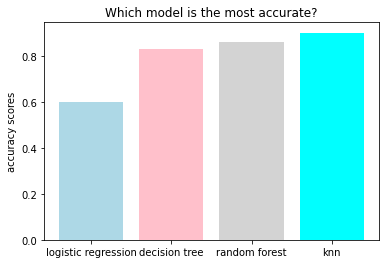

In [ ]:
models = ['logistic regression', 'decision tree', 'random forest', 'knn']
acc_scores = [0.60, 0.83, 0.86, 0.90]

plt.bar(models, acc_scores, color=['lightblue', 'pink', 'lightgrey', 'cyan'])
plt.ylabel("accuracy scores")
plt.title("Which model is the most accurate?")
plt.show()

so KNN having higher accuracy so model for KNN is best model for mobile prediction data set